# 2.8-Line-Chart-Workshop-Seaborn

Plot a chart from 2014, 2015, 2016

Here is the sample final product:

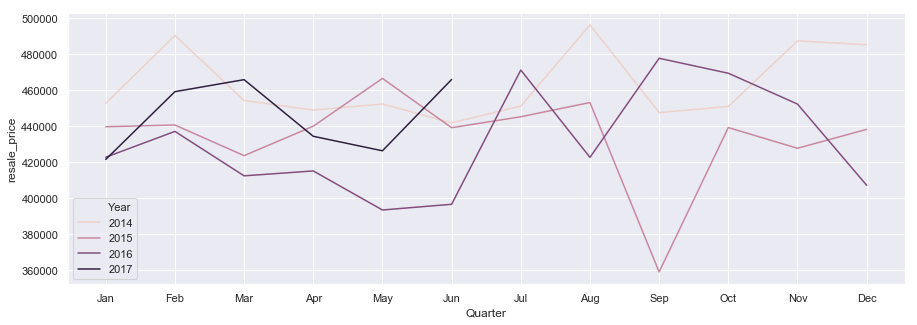}|

The Graph requires Data with average monthly resale price for year of 14, 15, and 16
We need to get the data by year, month, and monthly average resale

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
df = pd.read_csv("resale-sample-regression.csv", index_col=0)
plt.rc('figure', figsize=(19, 9))

In [2]:
#creating two new columns in the DF : Year and Quarterly
df['Year'], df['Quarter'] = df['month'].str.split('-',1).str
df.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Region,Year,Quarter
87705,2016-11,ANG MO KIO,4 ROOM,326,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1977,590000.0,North East,2016,11
86039,2016-10,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1978,490000.0,North East,2016,10


In [3]:
dfused=df[['Quarter', 'Year', 'resale_price']]

In [4]:
groupclean=dfused.groupby(['Quarter', 'Year']).resale_price.mean().reset_index()

In [5]:
groupclean

,Quarter,Year,resale_price
0,01,2013,512696.828571
1,01,2014,452680.000000
2,01,2015,439718.617021
3,01,2016,422750.000000
4,01,2017,421520.000000
5,02,2013,475263.040000
6,02,2014,490473.684211
7,02,2015,440673.076923
8,02,2016,437122.666667
9,02,2017,459218.769231


In [6]:
import seaborn as sns
sns.set()


In [7]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pale

In [8]:
groupclean.head(5)

,Quarter,Year,resale_price
0,01,2013,512696.828571
1,01,2014,452680.000000
2,01,2015,439718.617021
3,01,2016,422750.000000
4,01,2017,421520.000000


In [9]:
groupclean.dtypes

Quarter          object
Year             object
resale_price    float64
dtype: object

In [18]:
groupclean.Year=groupclean.Year.astype(int)
groupclean.Quarter=groupclean.Quarter.astype(int)
plt.rc('figure', figsize=(15, 5))

In [19]:
groupclean.dtypes

Quarter           int32
Year              int32
resale_price    float64
dtype: object

In [20]:
groupclean.Quarter.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [29]:
groupclean.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2012], dtype=int64)

In [41]:
groupclean=groupclean[groupclean['Year']>=2014]

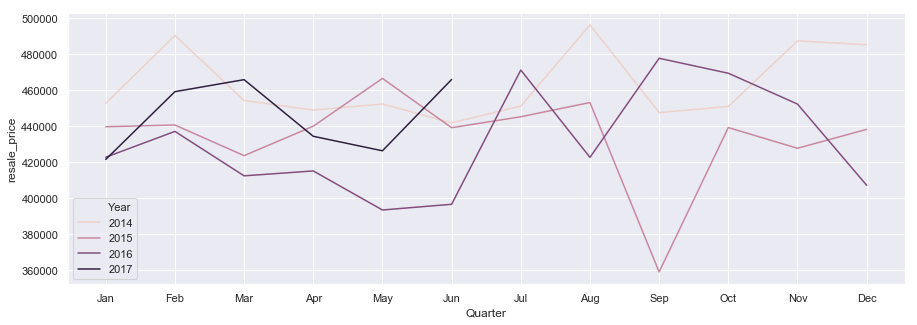

In [42]:
ax =sns.lineplot(x='Quarter', y='resale_price', hue='Year', data=groupclean)

plt.xticks(groupclean.Quarter.unique(),
          ["Jan", "Feb","Mar","Apr","May","Jun", "Jul","Aug","Sep","Oct", "Nov","Dec"])

#plt.legend( ncol=2, loc='lower left');
plt.show()